In [130]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread, imshow 
from skimage import morphology
from skimage.measure import label

In [126]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

def create_mask(img, mask_value=1):
    return img < 0

def binarize(img):
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret, fig = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return fig

True

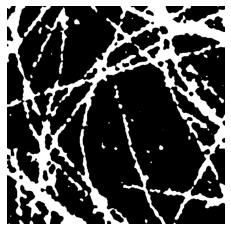

In [50]:
# TODO: Otsu's Binarization


# img = cv2.imread('/content/12.png', 0)
img = opened
blur = cv2.GaussianBlur(img,(11,11),0)
ret, fig = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(fig, cmap='gray')
# plt.savefig("1mask.png", bbox_inches='tight')
cv2.imwrite("tub-11x11-closing-disk4.png", fig)
# plt.show()

In [68]:
element = np.array([[0,0,0],
                    [0,1,0],
                    [0,0,0]])

def multi_ero(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im

def multi_dil(im, num, element=element):
    for i in range(num):
        im = dilation(im, element)
    return im

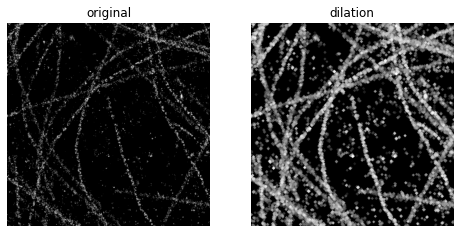

In [146]:
multi_eroded = multi_dil(orig_phantom, 3, disk(1))
plot_comparison(orig_phantom, multi_eroded, 'dilation')

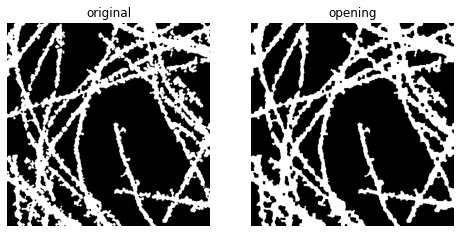

In [151]:
import cv2

# Load image, convert to grayscale, Gaussian blur, Otsu's threshold
# image = cv2.imread('1.jpg')
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray, (3,3), 0)
# thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

thresh = binarize(multi_eroded)

# Filter using contour area and remove small noise
cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 350:
        cv2.drawContours(thresh, [c], -1, (0,0,0), -1)

# Morph close and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

plot_comparison(thresh, close, 'opening')

# cv2_imshow('thresh', thresh)
# cv2_imshow('close', close)
# cv2.waitKey()

In [152]:
cv2.imwrite("tub-5x5-closing-rem-small.png", close)

True

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  """Entry point for launching an IPython kernel.


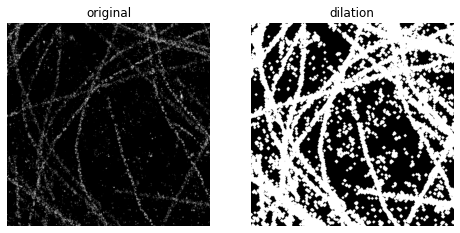

In [104]:
rem_small = morphology.remove_small_holes(multi_eroded,1)
plot_comparison(orig_phantom, rem_small, 'dilation')

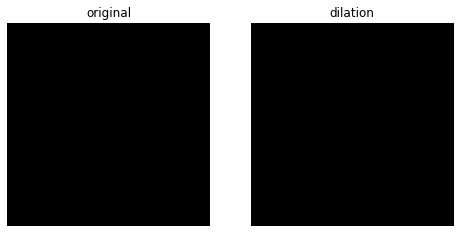

In [116]:
bin = create_mask(closed)
rem_small = morphology.remove_small_objects(bin ,2)
plot_comparison(bin, rem_small, 'dilation')

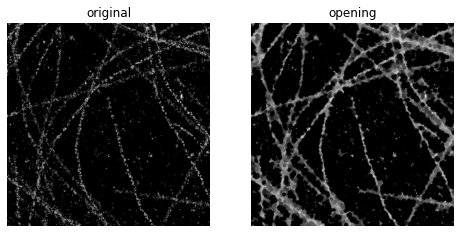

In [117]:
closed = closing(orig_phantom, disk(4))
plot_comparison(orig_phantom, closed, 'opening')

In [41]:
%cd /content/drive/MyDrive/MMsegmentation-data/ANNA-PALM/mask-comp

/content/drive/MyDrive/MMsegmentation-data/ANNA-PALM/mask-comp


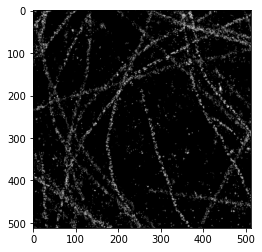

In [56]:
import skimage
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte
from skimage.io import imread

im = skimage.io.imread("/content/drive/MyDrive/MMsegmentation-data/ANNA-PALM/test_workdir_exp1/test/12.png", as_gray=1)
orig_phantom = img_as_ubyte(im)
fig, ax = plt.subplots()
ax.imshow(orig_phantom, cmap=plt.cm.gray)

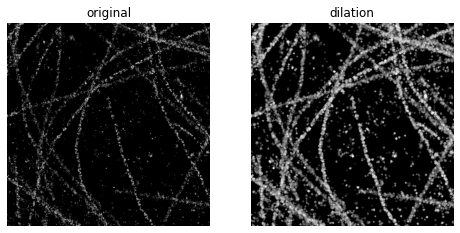

In [24]:
from skimage.morphology import (erosion, dilation, opening, closing,  # noqa
                                white_tophat)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image  # noqa
from skimage.morphology import disk, square  # noqa

# footprint = disk(3)
# m = square(5)
dilated = dilation(orig_phantom, disk(2))
plot_comparison(orig_phantom, dilated, 'dilation')

# vesicles

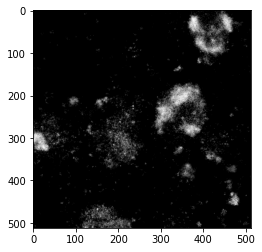

In [119]:
import skimage
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte
from skimage.io import imread

im = skimage.io.imread("/content/drive/MyDrive/MMsegmentation-data/ANNA-PALM/test_workdir_exp1/test/example_adipocytes.png", as_gray=1)
ves = img_as_ubyte(im)
fig, ax = plt.subplots()
ax.imshow(ves, cmap=plt.cm.gray)

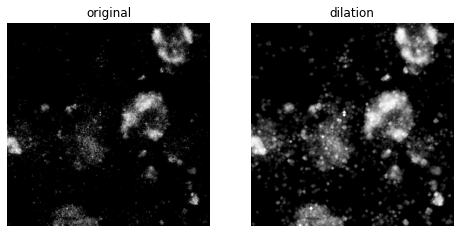

In [123]:
multi_dilated = multi_dil(ves, 3, disk(1))
plot_comparison(ves, multi_dilated, 'dilation')

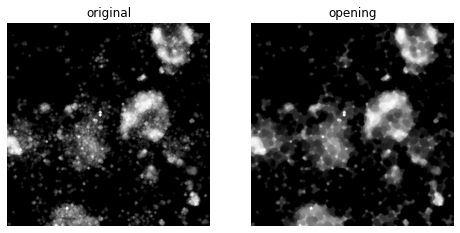

In [125]:
closed = closing(multi_dilated, disk(5))
plot_comparison(multi_dilated, closed, 'opening')

In [137]:
cv2.imwrite("ves-5x5-closing-disk5.png", binarize(closed))

True

In [ ]:
# bin = binarize(closed)
# rem_small = morphology.remove_small_objects(label(closed), 5)
# plot_comparison(bin, rem_small, 'dilation')

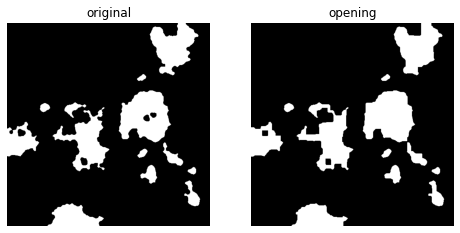

In [144]:
import cv2

# Load image, convert to grayscale, Gaussian blur, Otsu's threshold
# image = cv2.imread('1.jpg')
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray, (3,3), 0)
# thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

thresh = binarize(closed)

# Filter using contour area and remove small noise
cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 200:
        cv2.drawContours(thresh, [c], -1, (0,0,0), -1)

# Morph close and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

plot_comparison(thresh, close, 'opening')

# cv2_imshow('thresh', thresh)
# cv2_imshow('close', close)
# cv2.waitKey()

In [145]:
cv2.imwrite("ves-5x5-closing-rem-small.png", close)

True

# anna-palm

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
%cd /content/drive/MyDrive/MMsegmentation-data/ANNA-PALM
!pip install scipy==1.1
!pip install -r requirements.txt

/content/drive/MyDrive/MMsegmentation-data/ANNA-PALM
     |████████████████████████████████| 31.2 MB 1.5 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lucid 0.3.10 requires umap-learn, which is not installed.
lucid 0.3.10 requires numpy<=1.19, but you have numpy 1.21.6 which is incompatible.
pymc3 3.11.4 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
plotnine 0.6.0 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.2 which is incompatible.
jax 0.3.4 requires scipy>=1.2.1, but you have scipy 1.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 

In [ ]:
!python run_img.py --workdir=./test_workdir_exp1/ --load_dir=./ANNA-PALM_tubulin_wf_945_512x512 --phase=test

model: a_net_tensorflow

loading config.json from  ./ANNA-PALM_tubulin_wf_945_512x512/__model__/latest_config.json
override: model=a_net_tensorflow --> model=ms_ssim_l1_punet_squirrel_pix2pix_tensorflow



Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.


Instructions for updating:
Use tf.where in 2.0, whic

In [ ]:
%pwd

'/content/drive/MyDrive/MMsegmentation-data/ANNA-PALM'

In [ ]:
!python run.py --help

usage: run.py [-h] --workdir WORKDIR [--name NAME] [--load_dir LOAD_DIR]
              [--save_dir SAVE_DIR] [--seed SEED] [--dataroot DATAROOT]
              [--which_network WHICH_NETWORK] [--batchSize BATCHSIZE]
              [--loadSize LOADSIZE] [--fineSize FINESIZE]
              [--input_nc INPUT_NC] [--output_nc OUTPUT_NC]
              [--control_nc CONTROL_NC] [--control_classes CONTROL_CLASSES]
              [--lr_nc LR_NC] [--lr_scale LR_SCALE] [--lr_sigma LR_SIGMA]
              [--ngf NGF] [--ndf NDF] [--which_model_netD WHICH_MODEL_NETD]
              [--which_model_netG WHICH_MODEL_NETG] [--n_layers_D N_LAYERS_D]
              [--gpu_ids GPU_IDS] [--dataset_mode DATASET_MODE]
              [--model MODEL] [--which_direction WHICH_DIRECTION]
              [--nThreads NTHREADS] [--checkpoints_dir CHECKPOINTS_DIR]
              [--norm NORM] [--serial_batches]
              [--display_winsize DISPLAY_WINSIZE] [--display_id DISPLAY_ID]
              [--display_port DISPLAY_

###Visualize dataset and masks

In [ ]:
def plot_dataset(X, Y, num=5, vmin_x=0, vmax_x=255, vmax_y=2):
    """Visualize num examples from images X and labels Y"""
    fig, axes = plt.subplots(2,num, figsize=(15,6))
    for i,ax in enumerate(axes[0]):
        ax.imshow(X[i,:,:,0], cmap='gray', vmin=vmin_x, vmax=vmax_x)
        ax.axis('off')
        ax.set_title('image patch {}'.format(i))
    for i,ax in enumerate(axes[1]):
        ax.imshow(Y[i,:,:,0], vmin=0t, vmax=vmax_y)
        ax.axis('off')
        ax.set_title('label patch {}'.format(i))
    return fig

print("Train dataset shape (n_samples, height, width, n_channels): {}".format(X_train.shape))
print("Val dataset shape (n_samples, height, width, n_channels): {}".format(X_val.shape))

# visualize image and label patches
fig = plot_dataset(X_train, Y_train)
fig.suptitle("Example train patches")

fig = plot_dataset(X_val, Y_val)
fig.suptitle("Example val patches")